In [1]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# Simulated Poisson data: e.g., number of emails per day
np.random.seed(42)
data = np.random.poisson(lam=10, size=100)

with pm.Model() as model:
    lambda_param = pm.Exponential("lambda", 1.0)
    obs = pm.Poisson("obs", mu=lambda_param, observed=data)

    trace = pm.sample(1000, tune=1000, return_inferencedata=True)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 0 seconds.


In [2]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(5000, tune=1000, step=step, return_inferencedata=True)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [lambda]


Output()

/Users/madhu/pymc_env/lib/python3.13/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/Users/madhu/pymc_env/lib/python3.13/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),
/Users/madhu/pymc_env/lib/python3.13/site-packages/pymc/step_methods/metropolis.py:320: RuntimeWarning: overflow encountered in exp
  "accept": np.mean(np.exp(self.accept_rate_iter)),


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 0 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lambda,9.973,0.331,9.329,10.563,0.007,0.006,2272.0,1817.0,1.0


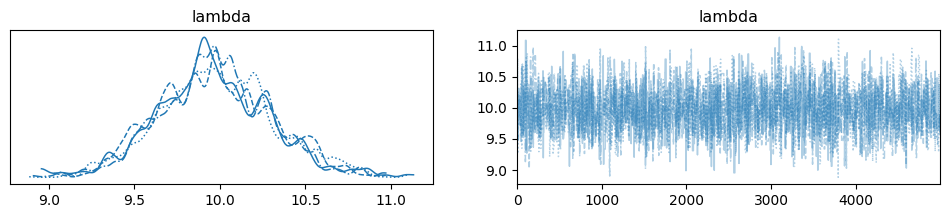

In [3]:
az.plot_trace(trace)
az.summary(trace)

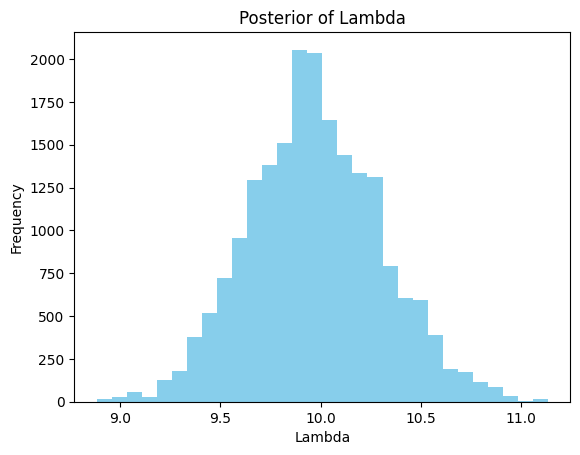

In [4]:
posterior_lambda = trace.posterior['lambda'].values.flatten()
plt.hist(posterior_lambda, bins=30, color='skyblue')
plt.title("Posterior of Lambda")
plt.xlabel("Lambda")
plt.ylabel("Frequency")
plt.show()